## Dataset
The dataset includes 13 columns, encompassing sleep duration, quality, sleep disorders, exercise, stress, diet, and other demographic data useful for analysis.

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

#### Consideraciones

This project is part of my personal portfolio and has been conducted for educational purposes. The data about this project are the property [DataCamp](https://www.datacamp.com/portfolio/cesarnavarro94) and have been taken from one of their data science courses.

# Preguntas

## como se relaciona la ocupacion con la duracion y la caldiad del sueño 
Que ocupacion tiene el promedio de duracion de sueño mas bajo
Que ocupacion tiene el promedio de calidad del sueño mas bajo

Es la misma ocupacion la que tiene ambos promedio mas bajos?

## Se relaciona el BMI con el padesimiento de de desordenes del sueño?
Cual es el porcentaje de personas con insomnio para cada categoria del BMI
Cual es el procentaje de personas con apnea para cada categoria del BMI

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# File import
file = "sleep_health_data.csv"
sleep_dt = pd.read_csv(file)

# Datacheck
print(sleep_dt.info)


<bound method DataFrame.info of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6  

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool
219
Axes(0.125,0.11;0.775x0.77)


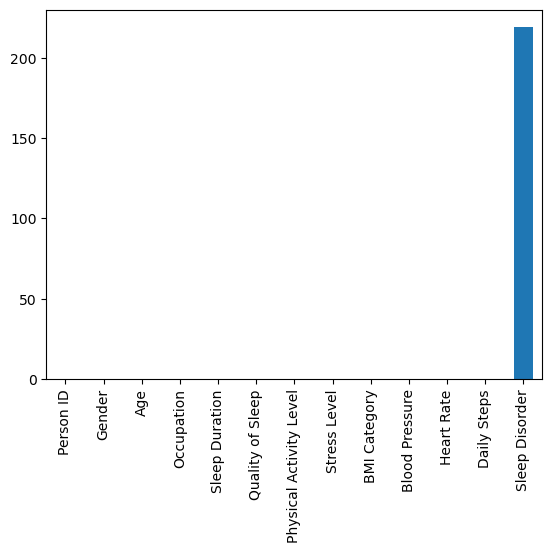

In [96]:
# Missing values detection
print(sleep_dt.isna().any())
print(sleep_dt["Sleep Disorder"].isna().sum())
missin_values = sleep_dt.isna().sum().plot(kind="bar")
print(missin_values)
plt.savefig("./figs/missin_values.png")


In [97]:
sleep_dt = sleep_dt.fillna("None")

In [98]:
sleep_dt.isna().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder             False
dtype: bool

Gender
Male      189
Female    185
Name: count, dtype: int64


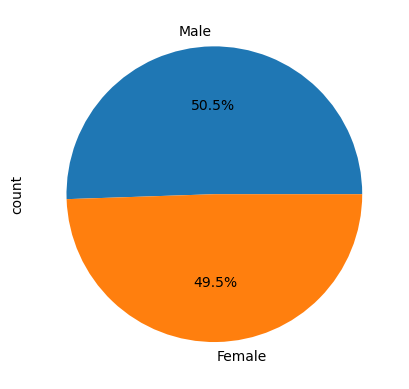

In [103]:
# Distribución de genero en la muestra
gender_counts = sleep_dt["Gender"].value_counts()
gender_counts.plot(kind="pie", autopct='%1.1f%%')
print(gender_counts)

plt.savefig("./figs/gender_distribution.png")


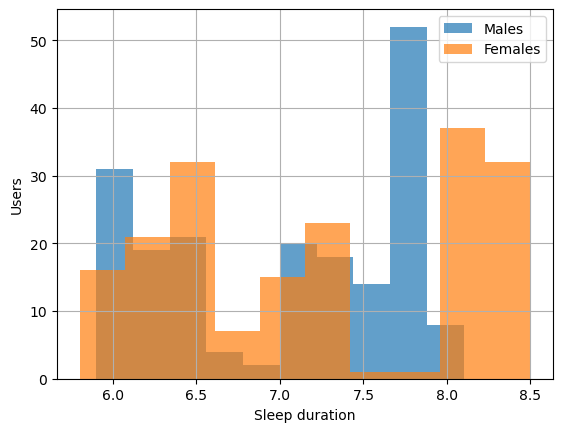

In [114]:
# Sleep duration by gender
male_sleep_dur = sleep_dt[sleep_dt["Gender"] == "Male"]["Sleep Duration"].hist(alpha=0.7)
female_sleep_dur = sleep_dt[sleep_dt["Gender"] == "Female"]["Sleep Duration"].hist(alpha=0.7)
plt.legend(["Males", "Females"])
plt.xlabel("Sleep duration")
plt.ylabel("Users")

plt.savefig("./figs/sleep_duration_gender.png")

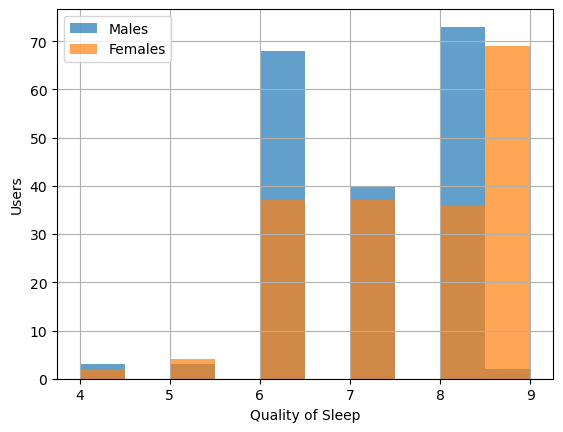

In [118]:
# Sleep quality by gender
male_sleep_qua = sleep_dt[sleep_dt["Gender"] == "Male"]["Quality of Sleep"].hist(alpha=0.7)
female_sleep_qua = sleep_dt[sleep_dt["Gender"] == "Female"]["Quality of Sleep"].hist(alpha=0.7)
plt.legend(["Males", "Females"])
plt.xlabel("Quality of Sleep")
plt.ylabel("Users")

plt.savefig("./figs/sleep_quality_gender.png")

El promedio de duracion del sueño para la muestra es 7.13
El promedio de calidad del sueño para la muestra es 7.31
Axes(0.125,0.11;0.775x0.77)


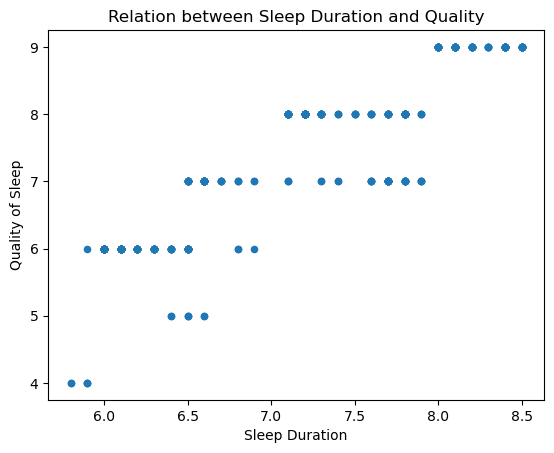

In [99]:

# Calculate the mean sleep duration
duration_mean = round(sleep_dt["Sleep Duration"].mean(), 2)
print("El promedio de duracion del sueño para la muestra es", duration_mean)

# Calculate the mean sleep quality
quality_mean = round(sleep_dt["Quality of Sleep"].mean(), 2)
print("El promedio de calidad del sueño para la muestra es", quality_mean)

# Get the sleep duration and quality data
sleep_duration = sleep_dt["Sleep Duration"]
sleep_quality = sleep_dt["Quality of Sleep"]

# Plot the relationship between sleep duration and quality
sleep_dur_qua_relation = sleep_dt.plot(kind="scatter",
                                       x="Sleep Duration",
                                       y="Quality of Sleep",
                                       title="Relation between Sleep Duration and Quality")

print(sleep_dur_qua_relation)

# Save the plot as an image
plt.savefig("sleep_dur_qua_relation.png")


Gender
Male      189
Female    185
Name: count, dtype: int64


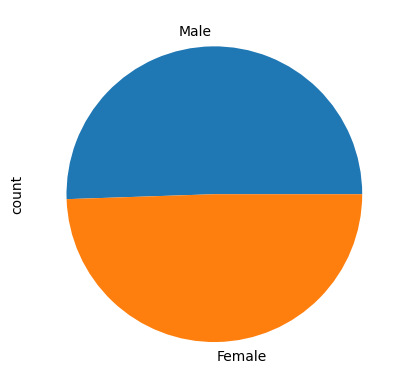

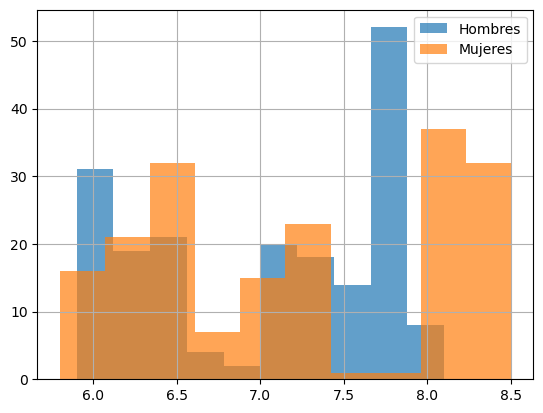

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64 Axes(0.125,0.11;0.775x0.77)


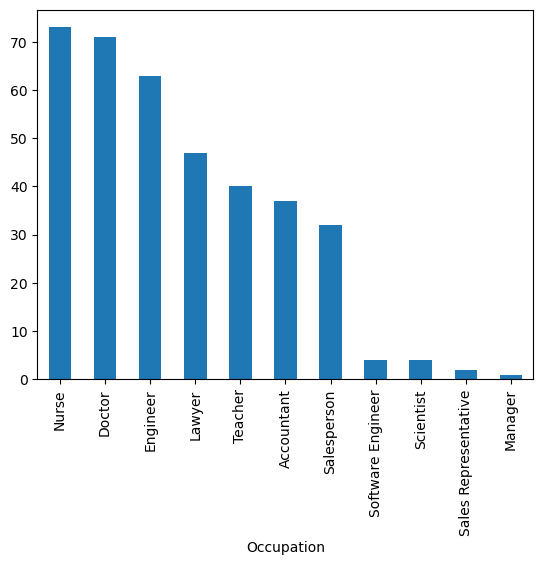

In [78]:
# Conteo de ocupaciones
occupation_counts = sleep_dt["Occupation"].value_counts(sort=True)

print(occupation_counts, occupation_counts.plot(kind="bar"))

Axes(0.125,0.11;0.775x0.77)
Sales Representative


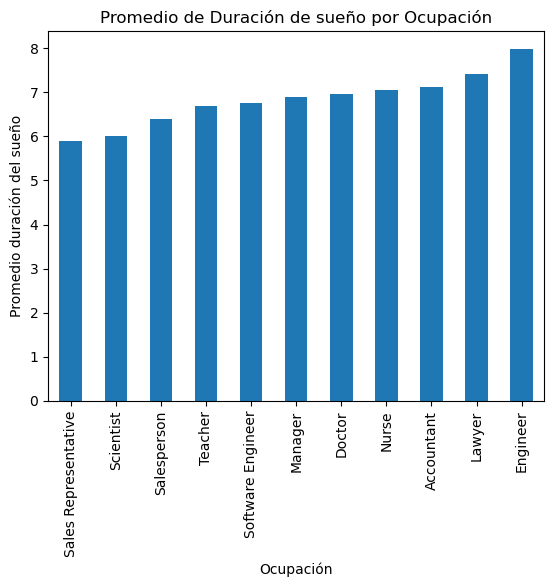

In [79]:
# Promedio de duracion del sueño por ocupación
sleep_dur_mean_occ = sleep_dt.groupby("Occupation")["Sleep Duration"].mean().sort_values()

print(sleep_dur_mean_occ.plot(kind="bar", 
                              title="Promedio de Duración de sueño por Ocupación",
                              xlabel="Ocupación",
                              ylabel="Promedio duración del sueño",))

lowest_sleep_occ = str(sleep_dur_mean_occ.index[0])
print(lowest_sleep_occ)


Axes(0.125,0.11;0.775x0.77)
Sales Representative


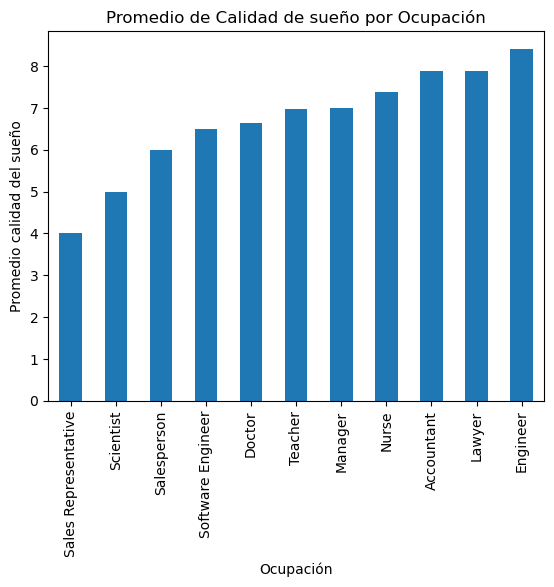

In [80]:
# Promedio de calidad del sueño por ocupación
sleep_qua_occ = sleep_dt.groupby("Occupation")["Quality of Sleep"].mean().sort_values()

print(sleep_qua_occ.plot(kind="bar", 
                              title="Promedio de Calidad de sueño por Ocupación",
                              xlabel="Ocupación",
                              ylabel="Promedio calidad del sueño",))
                              
lowest_sleep_quality_occ = str(sleep_qua_occ.index[0])
print(lowest_sleep_quality_occ)


In [81]:
# Define si una misma ocupación tiene los regisros de sueño y calidad más bajos
if lowest_sleep_occ == lowest_sleep_quality_occ:
    same_occ = True
else:
    same_occ = False

Axes(0.22375,0.11;0.5775x0.77)


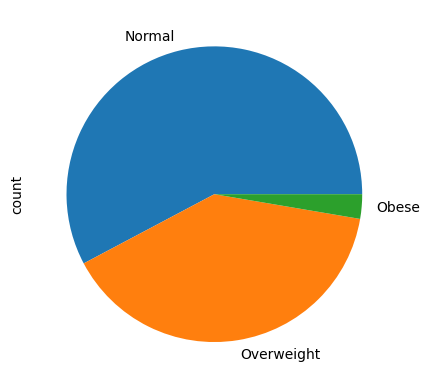

In [82]:
# Categorias de BMI
bmi_cat = sleep_dt["BMI Category"].value_counts(sort=True)

# Distribucion de usuario por BMI
print(bmi_cat.plot(kind="pie"))


Axes(0.125,0.11;0.775x0.77)


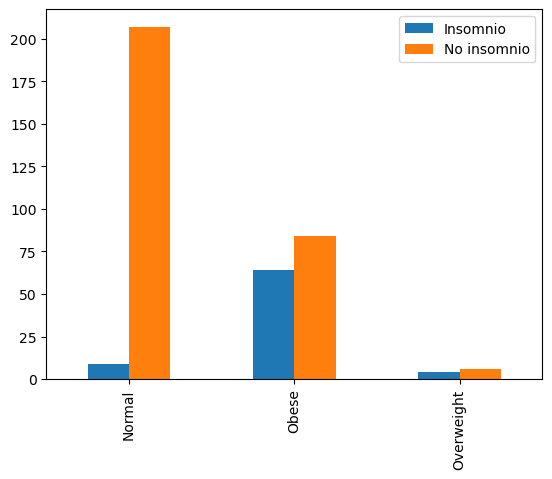

In [83]:
# Filtra los usuarios por cada categoria de BMI
bmi_normal = sleep_dt[sleep_dt["BMI Category"] == "Normal"]
bmi_obese = sleep_dt[sleep_dt["BMI Category"] == "Obese"]
bmi_overweight = sleep_dt[sleep_dt["BMI Category"] == "Overweight"]

# Filtra los usuarios que padecen insomnio por cada categoria del BMI
inso_bmi_normal = len(sleep_dt[(sleep_dt["BMI Category"] == "Normal") & (sleep_dt["Sleep Disorder"] == "Insomnia")])
inso_bmi_obese = len(sleep_dt[(sleep_dt["BMI Category"] == "Obese") & (sleep_dt["Sleep Disorder"] == "Insomnia")])
inso_bmi_overweight = len(sleep_dt[(sleep_dt["BMI Category"] == "Overweight") & (sleep_dt["Sleep Disorder"] == "Insomnia")])

# Crea un dataframe con los usuarios que padecen insomnio frente a los que no, por cada categoria BMI
inso_noinso_bmi = pd.DataFrame({"Insomnio" : [inso_bmi_normal,inso_bmi_overweight, inso_bmi_obese],
                                "No insomnio" : [len(bmi_normal)- inso_bmi_normal, len(bmi_overweight)-inso_bmi_overweight, len(bmi_obese)-inso_bmi_obese]},
                                index=["Normal","Obese","Overweight"])

print(inso_noinso_bmi.plot(kind="bar",stacked=False))


Axes(0.125,0.11;0.775x0.77)


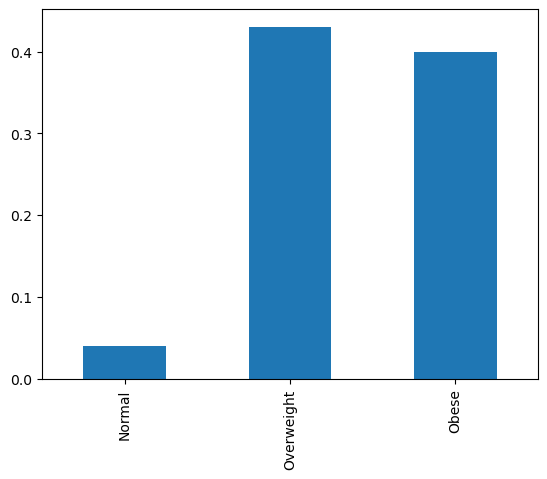

In [84]:
# Calcular el ratio, n/N de personas con insomnia por cada categoria del BMI
ratio_bmi_normal = float(round(inso_bmi_normal/len(bmi_normal),2))
ratio_bmi_obse = float(round(inso_bmi_obese/len(bmi_obese),2))
ratio_bmi_overweight = float(round(inso_bmi_overweight/len(bmi_overweight),2))

# Guardarlos en un diccionario
bmi_insomnia_ratios = {"Normal":ratio_bmi_normal,
                       "Overweight":ratio_bmi_overweight,
                       "Obese":ratio_bmi_obse,
}

# Ratios de presencia de insomnio por categoria BMI
print(pd.Series(bmi_insomnia_ratios).plot(kind="bar"))

In [85]:
# Relacion entre indice BMI y padecimiento de insomnia


In [86]:
# Gender 
